In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [68]:
df = pd.read_csv('Final.csv')

In [69]:
df.columns

Index(['movie_id', 'Crime', 'Drama', 'Comedy', 'Action', 'Thriller',
       'Adventure', 'Science Fiction', 'Animation', 'Family', 'Romance',
       'Mystery', 'Music', 'Horror', 'Fantasy', 'Documentary', 'War',
       'Western', 'History', 'Foreign', 'TV Movie', 'imdb_id', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'revenue', 'budget',
       'Cast 1', 'Cast 2', 'Production', 'Month', 'Year', 'Error'],
      dtype='object')

In [70]:
df.drop(['movie_id','imdb_id','Year','Error','release_date'], axis=1, inplace =True)

In [5]:
df.isnull().sum()


Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month              0
dtype: int64

In [6]:
df = pd.get_dummies(data = df, columns = ['Month'], drop_first=True)

In [7]:
df.isnull().sum()

Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month_2            0
Month_3            0
Month_4            0
Month_5            0
Month_6            0
Month_7            0
Month_8            0
Month_9            0
Month_10           0
Month_11           0
Month_12           0
dtype: int64

# 1. OLS 

## 1.1 Model specifications:

In [9]:
from statsmodels.tools.tools import add_constant
X = df.drop('revenue',axis=1)
y = df.revenue
col_to_std = X.nunique()[X.nunique()>10].index.to_list() 
#standardizing: 
X[col_to_std] = (X[col_to_std]-X[col_to_std].mean())/X[col_to_std].std()
y= (y-y.mean())/y.std()
X = add_constant(X)


In [10]:
model = sm.OLS(y,X.astype(int)).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     505.1
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:51:02   Log-Likelihood:                -13698.
No. Observations:               13912   AIC:                         2.747e+04
Df Residuals:                   13873   BIC:                         2.777e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3525      0.037     -9.586      0.000      -0.425      -0.280
Crime              -0.0509      0.016     -3.256      0.001      -0.082      -0.020
Drama              -0.1855      0.013    -13.921      0.000      -0.212      -0.159
Comedy             -0.0651      0.014     -4.591      0.000      -0.093      -0.037
Action              0.1261      0.015      8.429      0.000       0.097       0.155
Thriller           -0.0306      0.014     -2.155      0.031      -0.058      -0.003
Adventure           0.2463      0.017     14.421      0.000       0.213       0.280
Science Fiction    -0.0788      0.019     -4.259      0.000      -0.115      -0.043
Animation           0.2752      0.033      8.373      0.000       0.211       0.340
Family              0.2232      0.025      8.975      0.000       0.174       0.272
Romance             0.0818      0.015      5.330      0.000       0.052       0.112
Mystery            -0.0041      0.020     -0.210      0.834      -0.043       0.034
Music               0.0770      0.036      2.122      0.034       0.006       0.148
Horror             -0.0550      0.021     -2.568      0.010      -0.097      -0.013
Fantasy             0.2104      0.020     10.360      0.000       0.171       0.250
Documentary        -0.0635      0.098     -0.645      0.519      -0.256       0.129
War                -0.0008      0.031     -0.026      0.980      -0.062       0.060
Western            -0.2913      0.042     -6.973      0.000      -0.373      -0.209
History             0.0286      0.029      0.996      0.319      -0.028       0.085
Foreign            -0.3696      0.128     -2.899      0.004      -0.620      -0.120
TV Movie           -0.2597      0.460     -0.564      0.572      -1.162       0.642
popularity          0.1098      0.007     16.307      0.000       0.097       0.123
vote_average        0.0145      0.009      1.688      0.091      -0.002       0.031
vote_count          0.8063      0.009     92.283      0.000       0.789       0.823
budget             -0.0034      0.006     -0.617      0.537      -0.014       0.008
Cast 1              0.0583      0.013      4.349      0.000       0.032       0.085
Cast 2             -0.0188      0.019     -0.977      0.329      -0.057       0.019
Production          0.0261      0.005      4.790      0.000       0.015       0.037
Month_2             0.0482      0.029      1.636      0.102      -0.010       0.106
Month_3             0.0530      0.029      1.813      0.070      -0.004       0.110
Month_4             0.0783      0.030      2.642      0.008       0.020       0.136
Month_5             0.2077      0.028      7.404      0.000       0.153       0.263
Month_6             0.4301      0.030     14.327      0.000       0.371       0.489
Month_7             0.1583      0.030      5.312      0.000

#### -> low R square, some of the variables has high p-value

## 1.2 Checking OLS assumptions: 

### 1. Multicolinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Vif is used to check multicolinearity

In [17]:
VIF_result1 = pd.Series([vif(X.astype(int).values,i) for i in range(X.shape[1])],index=X.columns)
VIF_result1[VIF_result1>10]

const    44.704053
dtype: float64

#### -> no multicolinearilty

### 2. Normality

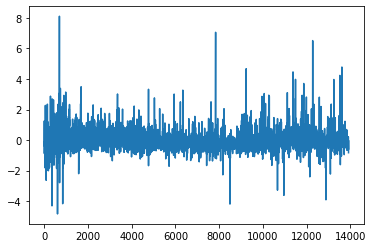

In [19]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

In [20]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [21]:
sms.jarque_bera(model.resid)

(295002.160019095, 0.0, 2.2573322112501186, 25.102821085831092)

### 3. Linearity

In [29]:
from scipy.stats import pearsonr
pearsonr(ypred,y)[1]

0.0

### 4. Homoskedasticity

In [22]:
sms.jarque_bera(model.resid)[1] < 0.05  # the 1st element is the skewness, if it is < 0.05 then the residual follow the normal distribution

True

In [26]:
sms.het_breuschpagan(model.resid, model.model.exog)

(2848.6594018845744, 0.0, 94.00285263099754, 0.0)

## 1.3 Prediction: 

In [30]:
ypred=model.predict(X)

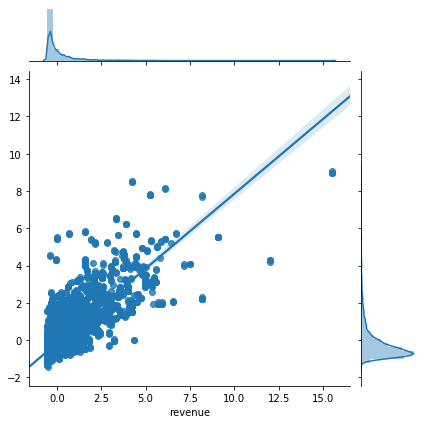

In [31]:
import seaborn as sns
sns.jointplot(y,ypred, kind='reg')

# 1.2 OLS - spliting test and train

## 1.2 Train test split:

In [54]:
from sklearn.model_selection import train_test_split

In [57]:
df.astype(int, inplace=True)

Crime  Drama  Comedy  Action  Thriller  Adventure  Science Fiction  \
0          1      0       1       0         0          0                0   
1          1      0       1       0         0          0                0   
2          1      0       0       1         1          0                0   
3          1      0       0       1         1          0                0   
4          1      0       0       1         1          0                0   
5          0      0       0       1         0          1                1   
6          0      0       0       1         0          1                1   
7          0      0       0       0         0          0                0   
8          0      1       1       0         0          0                0   
9          0      1       0       0         0          0                0   
10         0      1       0       0         0          0                0   
11         0      1       0       0         0          0                0   
12         0      1       0       0         0          0                0   
13         1      1       0       0         0          0                0   
14         1      1       0       0         0          0                0   
15         1      1       0       0         0          0                0   
16         1      1       0       0         0          0                0   
17         1      1       0       0         0          0                0   
18         1      1       0       0         0          0                0   
19         1      1       0       0         0          0                0   
20         1      1       0       0         0          0                0   
21         1      1       0       0         0          0                0   
22         1      1       0       0         0          0                0   
23         1      1       0       0         0          0                0   
24         1      1       0       0         0          0                0   
25         1      1       0       0         0          0                0   
26         1      1       0       0         0          0                0   
27         1      1       0       0         0          0                0   
28         1      1       0       0         0          0                0   
29         1      1       0       0         0          0                0   
...      ...    ...     ...     ...       ...        ...              ...   
13882      0      1       1       0         0          0                0   
13883      0      0       0       0         1          0                0   
13884      0      0       0       1         0          0                0   
13885      0      0       0       1         0          0                0   
13886      0      0       0       1         0          0                0   
13887      1      1       0       0         1          0                0   
13888      1      1       0       0         1          0                0   
13889      1      1       0       0         1          0                0   
13890      0      1       0       1         0          0                0   
13891      0      1       1       0         0          0                0   
13892      0      0       1       1         0          0                0   
13893      0      0       1       1         0          0                0   
13894      0      0       1       1         0          0                0   
13895      0      0       0       1         0          1                0   
13896      0      0       0       1         0          1                0   
13897      0      1       0       0         0          0                0   
13898      0      0       0       0         1          0                0   
13899      0      0       0       0         1          0                0   
13900      1      0       1       1         0          0                0   
13901      0      0       1       0         0          0                0   
139

In [58]:
col_to_std = df.nunique()[df.nunique()>10].index.to_list() 
df[col_to_std] = (df[col_to_std]-df[col_to_std].mean())/df[col_to_std].std()
df = add_constant(df)

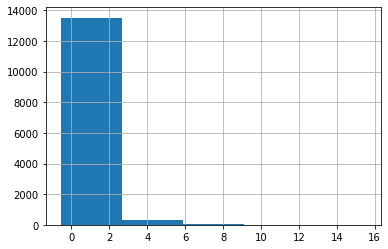

In [59]:
df.revenue.hist(bins=5)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


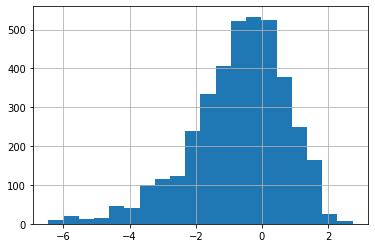

In [60]:
np.log(df.revenue).hist(bins=20)

In [71]:
y = np.log(df.revenue)
y= round((y-y.mean())/y.std(), 2)
y.shape

(13912,)

In [72]:
X = df.drop('revenue', axis =1)
X.shape

(13912, 28)

In [79]:
X.budget= np.log(df.budget)
X.popularity=round(X.popularity, 2)

## 1.2 RFE

In [80]:
reg = LinearRegression()
rfe = RFE(reg,15)

In [81]:
rfe = rfe.fit(X,y)

In [83]:
print(rfe.ranking_)

[ 7  1  1  1  2  1 12  1  1  4  6  5  1  3 10  1  1  1  1  1 11  1 14  1
  9  8  1 13]


In [84]:
X.columns[rfe.support_]

Index(['Drama', 'Comedy', 'Action', 'Adventure', 'Animation', 'Family',
       'Horror', 'War', 'Western', 'History', 'Foreign', 'TV Movie',
       'vote_average', 'budget', 'Production'],
      dtype='object')

In [85]:
X_new = X[X.columns[rfe.support_]]

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X_new, y, 
                                                   test_size=0.3, random_state=11)

In [87]:
import statsmodels.api as sm

In [88]:
model = sm.OLS(y_train,X_train)

In [89]:
model = model.fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.137
Method:                 Least Squares   F-statistic:                              104.5
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                   4.68e-301
Time:                        00:07:12   Log-Likelihood:                         -13167.
No. Observations:                9738   AIC:                                  2.636e+04
Df Residuals:                    9723   BIC:                                  2.647e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Drama           -0.4208      0.022    -18.790      0.000      -0.465      -0.377
Comedy          -0.1402      0.022     -6.338      0.000      -0.184      -0.097
Action           0.1136      0.025      4.600      0.000       0.065       0.162
Adventure        0.2675      0.028      9.400      0.000       0.212       0.323
Animation        0.0289      0.057      0.507      0.612      -0.083       0.140
Family           0.3458      0.042      8.222      0.000       0.263       0.428
Horror          -0.3125      0.035     -8.854      0.000      -0.382      -0.243
War              0.0059      0.053      0.111      0.912      -0.098       0.109
Western         -0.5003      0.071     -7.004      0.000      -0.640      -0.360
History          0.0614      0.049      1.260      0.208      -0.034       0.157
Foreign         -1.5814      0.210     -7.545      0.000      -1.992      -1.171
TV Movie        -3.9044      0.663     -5.891      0.000      -5.204      -2.605
vote_average    -0.0658      0.010     -6.620      0.000      -0.085      -0.046
budget           0.0342      0.004      8.842      0.000       0.027       0.042
Production       0.0447      0.009      4.763      0.000       0.026       0.063
==============================================================================
Omnibus:                     1953.060   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3934.434
Skew:                          -1.200   Prob(JB):                         0.00
Kurtosis:                       4.985   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
pred=model.predict(X_test)

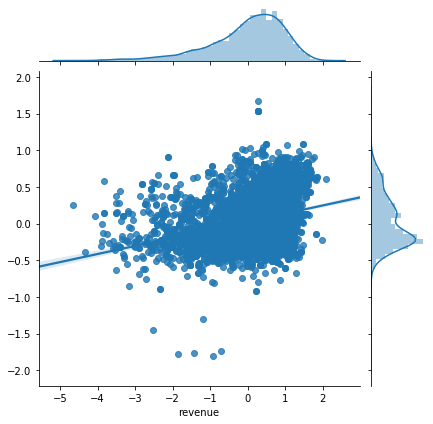

In [93]:
sns.jointplot(y_test,pred, kind='reg')